# MRP - Project

### Design, Development and Evaluation of Domain-Specific Topic Models and Classifiers for Public Health Using Big Social Data

## Kumara Prasanna Jayaraju

In [126]:
#!pip install praw

In [2]:
#pip install nbconvert

In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

### Collection for Data

In [2]:
#######
# IMPORT PACKAGES
#######

import praw
import pandas as pd
from datetime import datetime


# Acessing the reddit api


reddit = praw.Reddit(client_id = 'zMDhIYLH8MvxtA',
                     client_secret = 'a-uC9UvzWZouvMvM0fOunIH2dk4SWg',
                     user_agent = 'MRP_Learning',
                     username = 'Kumara-stu',
                     password = 'T@shi2021')     # your reddit password


Version 7.2.0 of praw is outdated. Version 7.4.0 was released Friday July 30, 2021.


In [4]:

print("My username on Reddit:", reddit.user.me())

My username on Reddit: Kumara-stu


In [6]:
# make a list of subreddits you want to scrape the data from
sub = ['worldnews','vaxxhappened','VACCINES', 'VaccineDiscussion', 'Vaccine',
      'vaccinationpics', 'VaccinatedLansing', 'TrueAntiVaccination',
      'toronto', 'reddit.com', 'Quebec', 'pregnant',
      'ontario', 'medicine', 'Health', 'epidemic',
      'DebateVaccine', 'CovidVaccine', 'CovidVaccinatedUncut',
      'covidlonghaulers', 'CovIdiots', 'COVID19positive',
      'COVID19_support', 'coronavirusme',
      'CoronavirusCanada', 'conspiracy', 'CanadaCoronavirus',
      'Canada']  

# Chosing the subreddit
print("List of Subreddits:")
for s in sub:
    print("Subreddit:", s)
    subreddit = reddit.subreddit(s)   
    
    
#Creating dictionary to store the data which will be converted to a dataframe

# Scraping is done using a search with following keyword
    query = ['COVID','COVID-19', 'Corona','Corona virus', 'corona','corona virus','Coronavirus',
             'Covaxin','covishield', 'UK Variant', 'indian Variant', 'vaccines', 'Pfizer', 
             'Moderna vaccine', 'AstraZeneca', 'BioNTech vaccine', 'Johnson & Johnson']

    for item in query:
        post_dict = {
            "title" : [],
            "score" : [],
            "id" : [],
            "url" : [],
            "comms_num": [],
            "created" : [],
            "body" : [],
            "author": [],
            #"treatment_tags": [],
            #"comment": [],
            #"upvote": [],
            "upvote_ratio":[],
            "permalink":[],
            #"user_reports":[],
            "subreddit_id":[],
            #"flair":[]

        }
        for submission in subreddit.search(item,sort = "top",limit = 10000):
            post_dict["title"].append(submission.title)
            post_dict["score"].append(submission.score)
            post_dict["id"].append(submission.id)
            post_dict["url"].append(submission.url)
            post_dict["comms_num"].append(submission.num_comments)
            post_dict["created"].append(datetime.fromtimestamp(submission.created))
            post_dict["body"].append(submission.selftext)
            post_dict["author"].append(submission.author)
            #post_dict["comment"].append(submission.comment)
            #post_dict["treatment_tags"].append(submission.treatment_tags)
            #post_dict["upvote"].append(submission.upvote)
            post_dict["upvote_ratio"].append(submission.upvote_ratio)
            post_dict["permalink"].append(submission.permalink)
            #post_dict["user_reports"].append(submission.user_reports)
            post_dict["subreddit_id"].append(submission.subreddit_id)
            #post_dict["flair"].append(submission.flair)
            
            post_data = pd.DataFrame(post_dict)
            post_data.to_csv(s+"_"+ item +"df_subreddit_MRP.csv")
        #print(post_data)

Subreddit: worldnews
Subreddit: vaxxhappened
Subreddit: VACCINES
Subreddit: VaccineDiscussion
Subreddit: Vaccine
Subreddit: vaccinationpics
Subreddit: VaccinatedLansing
Subreddit: TrueAntiVaccination
Subreddit: toronto
Subreddit: reddit.com
Subreddit: Quebec
Subreddit: pregnant
Subreddit: ontario
Subreddit: medicine
Subreddit: Health
Subreddit: epidemic
Subreddit: DebateVaccine
Subreddit: CovidVaccine
Subreddit: CovidVaccinatedUncut
Subreddit: covidlonghaulers
Subreddit: CovIdiots
Subreddit: COVID19positive
Subreddit: COVID19_support
Subreddit: coronavirusme
Subreddit: CoronavirusCanada
Subreddit: conpiracy
Subreddit: CanadaCoronavirus
Subreddit: Canada


### Combining the data from all the subreddits

In [1]:
import os
import pandas as pd
cwd = os.path.abspath('/Users/kumaraprasannajayaraju/MRP_DataSet/Prazzy/Raw_Files/')
files = os.listdir(cwd)

In [2]:
cwd

'/Users/kumaraprasannajayaraju/MRP_DataSet/Prazzy/Raw_Files'

In [4]:
df = pd.DataFrame()
for file in files:
    df = df.append(pd.read_csv(cwd+'/'+file, index_col=0), ignore_index = False)

In [5]:
df.head()

,title,score,id,url,comms_num,created,body,author,upvote_ratio,permalink,subreddit_id
0,UK nearing it's highest ever COVID-19 infectio...,459,oogbz7,https://www.reddit.com/r/medicine/comments/oog...,175,2021-07-20 21:55:47,"It feels like the sub is done with COVID-19, a...",MEANINGLESS_NUMBERS,0.96,/r/medicine/comments/oogbz7/uk_nearing_its_hig...,t5_2qhff
1,New Covid-19 strain in UK,106,kgzi9m,https://www.reddit.com/r/medicine/comments/kgz...,30,2020-12-20 13:41:32,https://www.cnn.com/2020/12/20/uk/uk-coronavir...,greatkaney,0.96,/r/medicine/comments/kgzi9m/new_covid19_strain...,t5_2qhff
2,Delta Variant,35,ob80cz,https://www.reddit.com/r/medicine/comments/ob8...,18,2021-06-30 18:18:52,Why do we think that the delta variant is mor...,gameringman,0.88,/r/medicine/comments/ob80cz/delta_variant/,t5_2qhff
3,Megathread #58: SARS-CoV-2/COVID-19. Month of ...,32,lbaesm,https://www.reddit.com/r/medicine/comments/lba...,185,2021-02-02 18:59:58,COVID-19 Megathread #58\n\nThis is a megathrea...,PokeTheVeil,0.93,/r/medicine/comments/lbaesm/megathread_58_sars...,t5_2qhff
4,You've had both your Moderna/Pfizer Covid vacc...,9,lh3gzk,https://www.reddit.com/r/medicine/comments/lh3...,25,2021-02-10 15:49:05,"I think the title says it all but here it is, ...",amothep8282,0.61,/r/medicine/comments/lh3gzk/youve_had_both_you...,t5_2qhff


In [6]:
df.shape

(30694, 11)

In [7]:
df.reset_index(drop=True, inplace=True)

### Exploratory Analysis

In [8]:
df.isnull().sum()

title               0
score               0
id                  0
url                 0
comms_num           0
created             0
body            16605
author              0
upvote_ratio        0
permalink           0
subreddit_id        0
dtype: int64

In [9]:
df = df.drop(df[df['body'].isnull()].index.tolist())

In [10]:
df.head()

,title,score,id,url,comms_num,created,body,author,upvote_ratio,permalink,subreddit_id
0,UK nearing it's highest ever COVID-19 infectio...,459,oogbz7,https://www.reddit.com/r/medicine/comments/oog...,175,2021-07-20 21:55:47,"It feels like the sub is done with COVID-19, a...",MEANINGLESS_NUMBERS,0.96,/r/medicine/comments/oogbz7/uk_nearing_its_hig...,t5_2qhff
1,New Covid-19 strain in UK,106,kgzi9m,https://www.reddit.com/r/medicine/comments/kgz...,30,2020-12-20 13:41:32,https://www.cnn.com/2020/12/20/uk/uk-coronavir...,greatkaney,0.96,/r/medicine/comments/kgzi9m/new_covid19_strain...,t5_2qhff
2,Delta Variant,35,ob80cz,https://www.reddit.com/r/medicine/comments/ob8...,18,2021-06-30 18:18:52,Why do we think that the delta variant is mor...,gameringman,0.88,/r/medicine/comments/ob80cz/delta_variant/,t5_2qhff
3,Megathread #58: SARS-CoV-2/COVID-19. Month of ...,32,lbaesm,https://www.reddit.com/r/medicine/comments/lba...,185,2021-02-02 18:59:58,COVID-19 Megathread #58\n\nThis is a megathrea...,PokeTheVeil,0.93,/r/medicine/comments/lbaesm/megathread_58_sars...,t5_2qhff
4,You've had both your Moderna/Pfizer Covid vacc...,9,lh3gzk,https://www.reddit.com/r/medicine/comments/lh3...,25,2021-02-10 15:49:05,"I think the title says it all but here it is, ...",amothep8282,0.61,/r/medicine/comments/lh3gzk/youve_had_both_you...,t5_2qhff


In [11]:
df.isnull().sum()

title           0
score           0
id              0
url             0
comms_num       0
created         0
body            0
author          0
upvote_ratio    0
permalink       0
subreddit_id    0
dtype: int64

In [12]:
df.count()

title           14089
score           14089
id              14089
url             14089
comms_num       14089
created         14089
body            14089
author          14089
upvote_ratio    14089
permalink       14089
subreddit_id    14089
dtype: int64

In [13]:
df.head()

,title,score,id,url,comms_num,created,body,author,upvote_ratio,permalink,subreddit_id
0,UK nearing it's highest ever COVID-19 infectio...,459,oogbz7,https://www.reddit.com/r/medicine/comments/oog...,175,2021-07-20 21:55:47,"It feels like the sub is done with COVID-19, a...",MEANINGLESS_NUMBERS,0.96,/r/medicine/comments/oogbz7/uk_nearing_its_hig...,t5_2qhff
1,New Covid-19 strain in UK,106,kgzi9m,https://www.reddit.com/r/medicine/comments/kgz...,30,2020-12-20 13:41:32,https://www.cnn.com/2020/12/20/uk/uk-coronavir...,greatkaney,0.96,/r/medicine/comments/kgzi9m/new_covid19_strain...,t5_2qhff
2,Delta Variant,35,ob80cz,https://www.reddit.com/r/medicine/comments/ob8...,18,2021-06-30 18:18:52,Why do we think that the delta variant is mor...,gameringman,0.88,/r/medicine/comments/ob80cz/delta_variant/,t5_2qhff
3,Megathread #58: SARS-CoV-2/COVID-19. Month of ...,32,lbaesm,https://www.reddit.com/r/medicine/comments/lba...,185,2021-02-02 18:59:58,COVID-19 Megathread #58\n\nThis is a megathrea...,PokeTheVeil,0.93,/r/medicine/comments/lbaesm/megathread_58_sars...,t5_2qhff
4,You've had both your Moderna/Pfizer Covid vacc...,9,lh3gzk,https://www.reddit.com/r/medicine/comments/lh3...,25,2021-02-10 15:49:05,"I think the title says it all but here it is, ...",amothep8282,0.61,/r/medicine/comments/lh3gzk/youve_had_both_you...,t5_2qhff


### Feature Engineering

In [14]:
## working on created(Date and Time) column.

In [15]:
weekDays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [16]:
df['Month'] = pd.DatetimeIndex(df['created']).month
df['DayOfWeek'] = pd.DatetimeIndex(df['created']).dayofweek
df['HourofDay'] = pd.DatetimeIndex(df['created']).hour
df['Day'] = pd.DatetimeIndex(df['created']).day
df['Year'] = pd.DatetimeIndex(df['created']).year

In [17]:

#Adding Columns ['coder1_label', 'description1', 'coder2_label', 'description2', 'consensus', 'reaction'] for Analysis
df = df.assign(coder1_label='', description1= '', coder2_label='', description2 = '',
               consensus='', reaction='')


In [18]:
df.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body', 'author',
       'upvote_ratio', 'permalink', 'subreddit_id', 'Month', 'DayOfWeek',
       'HourofDay', 'Day', 'Year', 'coder1_label', 'description1',
       'coder2_label', 'description2', 'consensus', 'reaction'],
      dtype='object')

In [19]:
##Re-Arranging columns

df= df[['created', 'Day', 'Month', 'Year','HourofDay','DayOfWeek',
       'body', 'coder1_label', 'description1', 'coder2_label',
       'description2', 'consensus', 'reaction','score', 'id', 'url', 'comms_num', 'author',
       'upvote_ratio', 'permalink', 'subreddit_id']]

In [20]:
### Exporting Clean Data set
    #df.to_csv("Clean_dataset.csv", index = False)

In [21]:
### Importing Clean Data set
    #df1 = pd.read_csv("Clean_dataset.csv")

In [22]:
df.head()

,created,Day,Month,Year,HourofDay,DayOfWeek,body,coder1_label,description1,coder2_label,...,consensus,reaction,score,id,url,comms_num,author,upvote_ratio,permalink,subreddit_id
0,2021-07-20 21:55:47,20,7,2021,21,1,"It feels like the sub is done with COVID-19, a...",,,,...,,,459,oogbz7,https://www.reddit.com/r/medicine/comments/oog...,175,MEANINGLESS_NUMBERS,0.96,/r/medicine/comments/oogbz7/uk_nearing_its_hig...,t5_2qhff
1,2020-12-20 13:41:32,20,12,2020,13,6,https://www.cnn.com/2020/12/20/uk/uk-coronavir...,,,,...,,,106,kgzi9m,https://www.reddit.com/r/medicine/comments/kgz...,30,greatkaney,0.96,/r/medicine/comments/kgzi9m/new_covid19_strain...,t5_2qhff
2,2021-06-30 18:18:52,30,6,2021,18,2,Why do we think that the delta variant is mor...,,,,...,,,35,ob80cz,https://www.reddit.com/r/medicine/comments/ob8...,18,gameringman,0.88,/r/medicine/comments/ob80cz/delta_variant/,t5_2qhff
3,2021-02-02 18:59:58,2,2,2021,18,1,COVID-19 Megathread #58\n\nThis is a megathrea...,,,,...,,,32,lbaesm,https://www.reddit.com/r/medicine/comments/lba...,185,PokeTheVeil,0.93,/r/medicine/comments/lbaesm/megathread_58_sars...,t5_2qhff
4,2021-02-10 15:49:05,10,2,2021,15,2,"I think the title says it all but here it is, ...",,,,...,,,9,lh3gzk,https://www.reddit.com/r/medicine/comments/lh3...,25,amothep8282,0.61,/r/medicine/comments/lh3gzk/youve_had_both_you...,t5_2qhff


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14089 entries, 0 to 30691
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created       14089 non-null  object 
 1   Day           14089 non-null  int64  
 2   Month         14089 non-null  int64  
 3   Year          14089 non-null  int64  
 4   HourofDay     14089 non-null  int64  
 5   DayOfWeek     14089 non-null  int64  
 6   body          14089 non-null  object 
 7   coder1_label  14089 non-null  object 
 8   description1  14089 non-null  object 
 9   coder2_label  14089 non-null  object 
 10  description2  14089 non-null  object 
 11  consensus     14089 non-null  object 
 12  reaction      14089 non-null  object 
 13  score         14089 non-null  int64  
 14  id            14089 non-null  object 
 15  url           14089 non-null  object 
 16  comms_num     14089 non-null  int64  
 17  author        14089 non-null  object 
 18  upvote_ratio  14089 non-nu

In [24]:
df["created"] = pd.to_datetime(df["created"])

In [25]:
max(df['created'])

Timestamp('2021-08-25 12:01:38')

In [26]:
min(df['created'])

Timestamp('2009-07-09 02:02:41')

In [27]:
df.count()

created         14089
Day             14089
Month           14089
Year            14089
HourofDay       14089
DayOfWeek       14089
body            14089
coder1_label    14089
description1    14089
coder2_label    14089
description2    14089
consensus       14089
reaction        14089
score           14089
id              14089
url             14089
comms_num       14089
author          14089
upvote_ratio    14089
permalink       14089
subreddit_id    14089
dtype: int64

### Data Visualizatoin:

In [28]:
import matplotlib.pyplot as plt

In [29]:
# df["date"] = df["data-timestamp"].astype("int64").astype("datetime64[ms]")
# df["day"] = df["date"].dt.weekday
# day = ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]

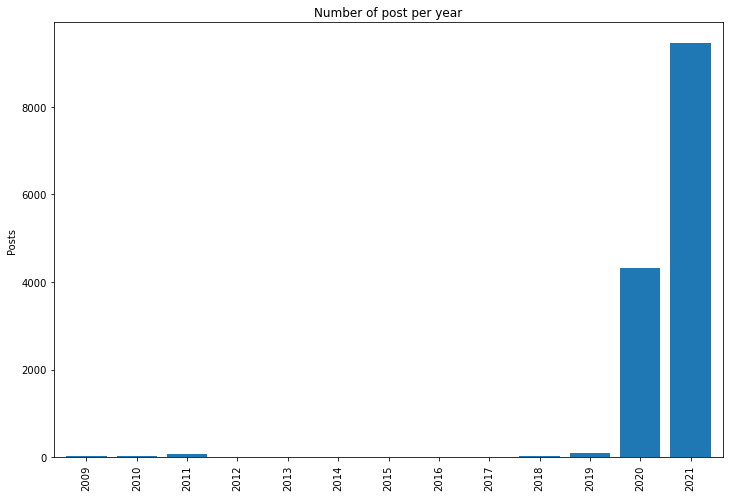

In [30]:
## N of posts in the yearly top 250 vs time
# Based on the year
plt.rcParams["figure.figsize"] = (12,8)
ax = df["Year"].groupby(df["Year"]).count().plot(kind="bar", width=0.8)
ax.set(xlabel="", ylabel="Posts", title="Number of post per year")
#plt.xticks(range(7), DayOfWeek)
plt.show()

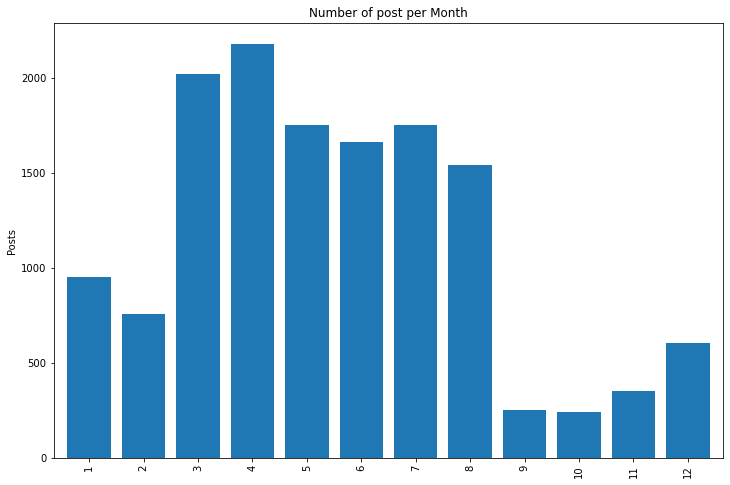

In [31]:
plt.rcParams["figure.figsize"] = (12,8)
ax = df["Month"].groupby(df["Month"]).count().plot(kind="bar", width=0.8)
ax.set(xlabel="", ylabel="Posts", title="Number of post per Month")
#plt.xticks(range(7), DayOfWeek)
plt.show()

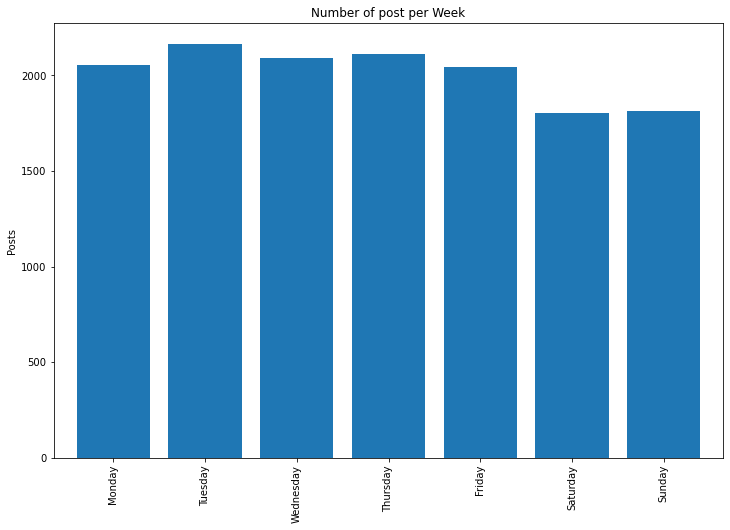

In [32]:
# Based on the day of the week
plt.rcParams["figure.figsize"] = (12,8)
ax = df["DayOfWeek"].groupby(df["DayOfWeek"]).count().plot(kind="bar", width=0.8)
ax.set(xlabel="", ylabel="Posts", title="Number of post per Week")
plt.xticks(range(7), weekDays)
plt.show()

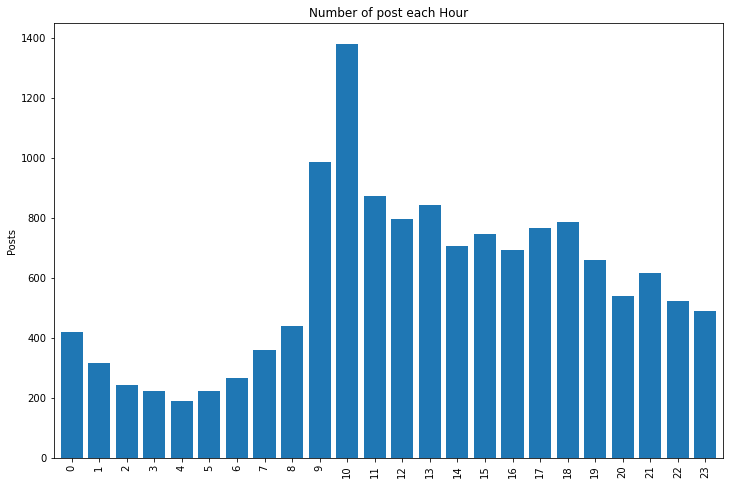

In [33]:
# Based on the time of the day
ax = df["HourofDay"].groupby(df["HourofDay"]).count().plot(kind="bar", width=0.8)
plt.rcParams["figure.figsize"] = (12,8)
ax.set(xlabel="", ylabel="Posts", title="Number of post each Hour") # Default is UTC
plt.show()

Upvote range: 0 8575


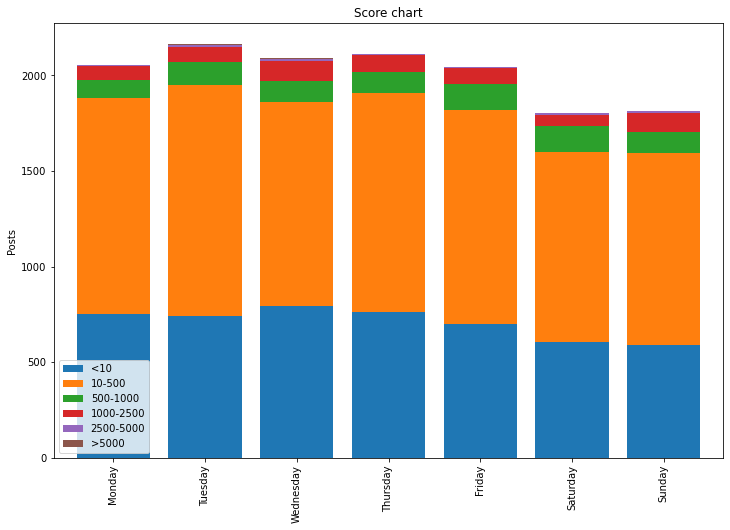

In [34]:
# Based on the day of the week, but segmented into upvote count groups
minscr = df["score"].min()
maxscr = df["score"].max()
print("Upvote range:", minscr, maxscr)

# Manually determine certain segmentation
dfseg = pd.DataFrame(index=range(7), columns=[])
dfseg["<10"] = df[df["score"]<=10]["DayOfWeek"].groupby(df["DayOfWeek"]).count()
dfseg["10-500"] = df[(df["score"]>10) & (df["score"]<=500)]["DayOfWeek"].groupby(df["DayOfWeek"]).count()
dfseg["500-1000"] = df[(df["score"]>500) & (df["score"]<=1000)]["DayOfWeek"].groupby(df["DayOfWeek"]).count()
dfseg["1000-2500"] = df[(df["score"]>1000) & (df["score"]<=2500)]["DayOfWeek"].groupby(df["DayOfWeek"]).count()
dfseg["2500-5000"] = df[(df["score"]>2500) & (df["score"]<=5000)]["DayOfWeek"].groupby(df["DayOfWeek"]).count()
dfseg[">5000"] = df[df["score"]>5000]["DayOfWeek"].groupby(df["DayOfWeek"]).count()

ax = dfseg.plot(kind="bar", stacked=True, width=0.8)
ax.set(xlabel="", ylabel="Posts", title="Score chart")
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(range(7), weekDays)
plt.show()

Upvote range: 0 8575


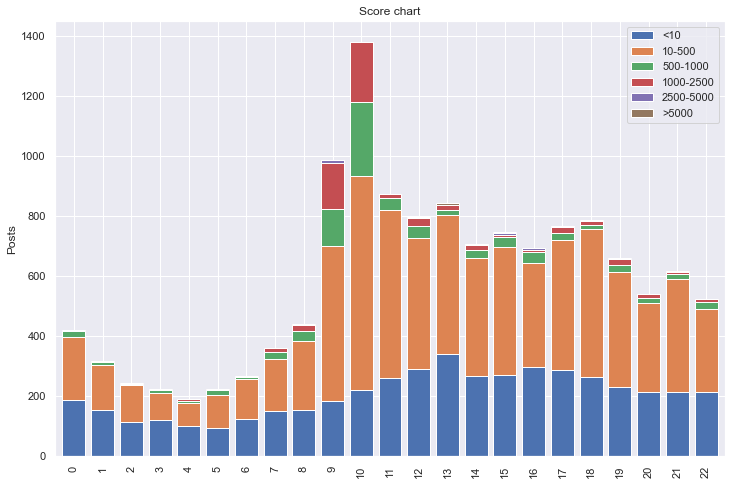

In [151]:
# Based on the day of the week, but segmented into upvote count groups
minscr = df["score"].min()
maxscr = df["score"].max()
print("Upvote range:", minscr, maxscr)

# Manually determine certain segmentation
dfseg = pd.DataFrame(index=range(23), columns=[])
dfseg["<10"] = df[df["score"]<=10]["HourofDay"].groupby(df["HourofDay"]).count()
dfseg["10-500"] = df[(df["score"]>10) & (df["score"]<=500)]["HourofDay"].groupby(df["HourofDay"]).count()
dfseg["500-1000"] = df[(df["score"]>500) & (df["score"]<=1000)]["HourofDay"].groupby(df["HourofDay"]).count()
dfseg["1000-2500"] = df[(df["score"]>1000) & (df["score"]<=2500)]["HourofDay"].groupby(df["HourofDay"]).count()
dfseg["2500-5000"] = df[(df["score"]>2500) & (df["score"]<=5000)]["HourofDay"].groupby(df["HourofDay"]).count()
dfseg[">5000"] = df[df["score"]>5000]["HourofDay"].groupby(df["HourofDay"]).count()

ax = dfseg.plot(kind="bar", stacked=True, width=0.8)
ax.set(xlabel="", ylabel="Posts", title="Score chart")
plt.rcParams["figure.figsize"] = (12,8)
#plt.xticks(range(7), weekDays)
plt.show()

In [35]:
df.head()

,created,Day,Month,Year,HourofDay,DayOfWeek,body,coder1_label,description1,coder2_label,...,consensus,reaction,score,id,url,comms_num,author,upvote_ratio,permalink,subreddit_id
0,2021-07-20 21:55:47,20,7,2021,21,1,"It feels like the sub is done with COVID-19, a...",,,,...,,,459,oogbz7,https://www.reddit.com/r/medicine/comments/oog...,175,MEANINGLESS_NUMBERS,0.96,/r/medicine/comments/oogbz7/uk_nearing_its_hig...,t5_2qhff
1,2020-12-20 13:41:32,20,12,2020,13,6,https://www.cnn.com/2020/12/20/uk/uk-coronavir...,,,,...,,,106,kgzi9m,https://www.reddit.com/r/medicine/comments/kgz...,30,greatkaney,0.96,/r/medicine/comments/kgzi9m/new_covid19_strain...,t5_2qhff
2,2021-06-30 18:18:52,30,6,2021,18,2,Why do we think that the delta variant is mor...,,,,...,,,35,ob80cz,https://www.reddit.com/r/medicine/comments/ob8...,18,gameringman,0.88,/r/medicine/comments/ob80cz/delta_variant/,t5_2qhff
3,2021-02-02 18:59:58,2,2,2021,18,1,COVID-19 Megathread #58\n\nThis is a megathrea...,,,,...,,,32,lbaesm,https://www.reddit.com/r/medicine/comments/lba...,185,PokeTheVeil,0.93,/r/medicine/comments/lbaesm/megathread_58_sars...,t5_2qhff
4,2021-02-10 15:49:05,10,2,2021,15,2,"I think the title says it all but here it is, ...",,,,...,,,9,lh3gzk,https://www.reddit.com/r/medicine/comments/lh3...,25,amothep8282,0.61,/r/medicine/comments/lh3gzk/youve_had_both_you...,t5_2qhff


In [36]:
# Common post title words
freq = pd.Series(' '.join(df['body']).split()).value_counts()[:20]
freq

the     131008
and     107990
to      107716
*       100644
I        89576
of       88458
in       67479
a        66442
/        63348
-        55736
is       37622
my       36387
that     35062
for      33840
with     33470
have     32256
are      31178
last     29587
on       28180
was      26538
dtype: int64

In [37]:
# Uncommon post title words
freq =  pd.Series(' '.join(df['body']).split()).value_counts()[-20:]
freq

|Halton|90s|MALE|Close          1
familiarizing                   1
**Hosp/ICU(468/160)484/158**    1
parotid                         1
recurrent/persistent            1
Episode.                        1
telecommuting.                  1
🔥!                              1
producing.                      1
Beverly                         1
swedes                          1
YAY!)                           1
overdose.                       1
unbelief                        1
Studies",                       1
Keeley,                         1
Phone:                          1
Lanark|90s|MALE|Close           1
10+.                            1
NAAT.                           1
dtype: int64

In [38]:
content = df['body'].to_numpy()

In [39]:
import re
import nltk

# Stopwords: Stop words include the large number of prepositions, pronouns, conjunctions etc in sentences.
nltk.download('stopwords')
from nltk.corpus import stopwords

# Normalization (Stemming & lemmatization): Convert to base word, ex: 
# Stemming = learn, learned, learning, learner > learn
# Lemmatization = better > good, was > be, meeting > meeting
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

# Obtaining part-of-speech tags:
from nltk import pos_tag

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kumaraprasannajayaraju/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kumaraprasannajayaraju/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [113]:
# Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

# Creating a list of custom stopwords
new_words = ["SARS", "POLIO", 'www', 'http', 'bing', 'google', 'spreadsheet', 'com', 'postal', 'https:', 'html', 'index']
stop_words = stop_words.union(new_words)

In [124]:
corpus = []
for sentence in content:
  # Remove punctuations, tags, special characters and digits
  text = re.sub('[^a-zA-Z]', ' ', sentence)
  text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
  text=re.sub("(\\d|\\W)+"," ",text)
  text = re.sub(r'http\S+', '', text)

  text = text.lower() # Convert to lowercase
  text = text.split() # Convert to list from string
  
  # Stemming then Lemmatisation
  ps = PorterStemmer()
  lem = WordNetLemmatizer()
  text = [lem.lemmatize(word) for word in text if not word in stop_words] 
  text = " ".join(text)
  corpus.append(text)

In [125]:
len(corpus)

14089

In [126]:
content[1]

'https://www.cnn.com/2020/12/20/uk/uk-coronavirus-variant-intl-gbr/index.html\n\nI\'m having trouble finding more information on specifically what this new strain changes and it\'s implications. Some articles suggest it is a mutation to the spike protein, meanwhile other sources suggest it would not affect the vaccine. \nIs this strain more virulent, more infectious?\n\nEdit, I\'ve found this :\nhttps://www.ecdc.europa.eu/en/publications-data/threat-assessment-brief-rapid-increase-sars-cov-2-variant-united-kingdom\n\nIn the PDF of the ecdc europa link above: \n"No phenotypic data are available for the new variant and no data are available with respect to the ability of antibodies \r\nelicited by vaccines under development to neutralise this variant. As mentioned above, the new virus variant displays\r\nseveral mutations in the spike protein, including in the receptor binding site. Most of the new candidate vaccines are \r\nbased upon the spike protein sequence. It is therefore essentia

In [127]:
corpus[1]

'cnn uk uk coronavirus variant intl gbr trouble finding information specifically new strain change implication article suggest mutation spike protein meanwhile source suggest would affect vaccine strain virulent infectious edit found ecdc europa eu en publication data threat assessment brief rapid increase sars cov variant united kingdom pdf ecdc europa link phenotypic data available new variant data available respect ability antibody elicited vaccine development neutralise variant mentioned new virus variant display several mutation spike protein including receptor binding site new candidate vaccine based upon spike protein sequence therefore essential monitor change spike protein among circulating sars cov strain ass possible antigenic change antigenic characterisation new variant ongoing result expected coming week important carry surveillance field effectiveness covid vaccine use possible including variant virus specific estimate surveillance primary vaccine failure using variant v

In [128]:
corpus3 =[]
for w in corpus:
    if w not in stop_words:
        corpus3.append(w)

In [129]:
corpus3[1]

'cnn uk uk coronavirus variant intl gbr trouble finding information specifically new strain change implication article suggest mutation spike protein meanwhile source suggest would affect vaccine strain virulent infectious edit found ecdc europa eu en publication data threat assessment brief rapid increase sars cov variant united kingdom pdf ecdc europa link phenotypic data available new variant data available respect ability antibody elicited vaccine development neutralise variant mentioned new virus variant display several mutation spike protein including receptor binding site new candidate vaccine based upon spike protein sequence therefore essential monitor change spike protein among circulating sars cov strain ass possible antigenic change antigenic characterisation new variant ongoing result expected coming week important carry surveillance field effectiveness covid vaccine use possible including variant virus specific estimate surveillance primary vaccine failure using variant v

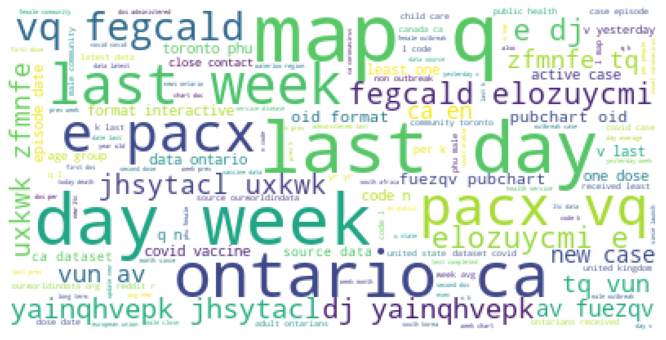

In [130]:
# Word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.rcParams["figure.figsize"] = (12, 6) # Frame size
wordcloud = WordCloud(  
  background_color='white',
  stopwords=stop_words,
  max_words=200,
  max_font_size=50, 
  random_state=42,
  # Render resolution
  width=400,
  height=200
  ).generate(str(corpus))
                         
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [131]:
# Removing everything except Noun
# Using part-of-speech (POS) tagging:
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

corpus2 = []
for sentence in corpus:
  words = sentence.split()
  tagged = pos_tag(words)

  # Only get the ones with N** tagging
  nouns = [s[0] for s in tagged if s[1][0] == 'N']

  # Revert back the array of words into a sentence
  corpus2.append(' '.join(nouns))

In [132]:
corpus2[1]

'cnn coronavirus variant intl gbr trouble information strain change implication article mutation spike protein source suggest vaccine strain virulent edit eu publication data threat brief increase sars kingdom pdf ecdc europa phenotypic data variant data ability antibody vaccine development neutralise variant virus display mutation spike protein receptor site candidate vaccine protein sequence monitor change spike protein sars ass change characterisation variant result week carry surveillance field effectiveness covid vaccine use virus estimate surveillance vaccine failure virus outcome impact vaccine effectiveness cell immunity role protection clearance covid virus infection cell immunity sars infection vaccination role protection'

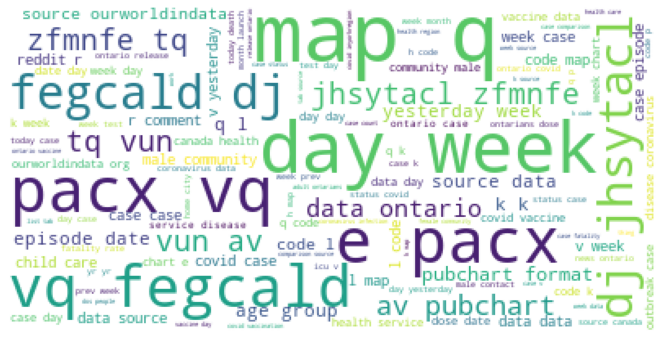

In [133]:
# Word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.rcParams["figure.figsize"] = (12, 6) # Frame size
wordcloud = WordCloud(  
  background_color='white',
  stopwords=stop_words,
  max_words=200,
  max_font_size=50, 
  random_state=42,
  # Render resolution
  width=400,
  height=200
  ).generate(str(corpus2))
                         
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [134]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=150,
                          max_font_size=100, 
                          random_state=42
                         ).generate(str(corpus2))

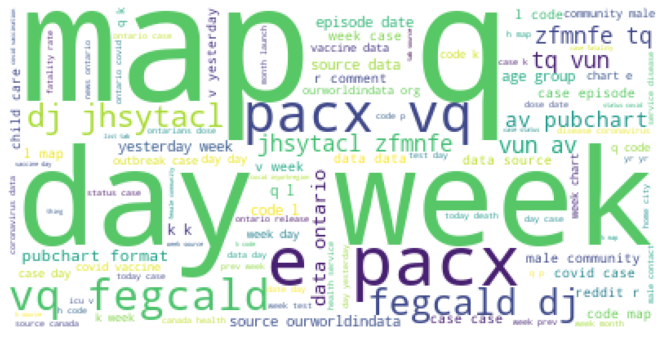

In [135]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1900)

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [137]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=1000000, ngram_range=(1,3))
X=cv.fit_transform(corpus)
#X.shape

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['https', 'polio', 'sars'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [138]:
list(cv.vocabulary_.keys())[:20]

['feel',
 'like',
 'sub',
 'done',
 'covid',
 'want',
 'point',
 'uk',
 'day',
 'average',
 'going',
 'reach',
 'time',
 'high',
 'middle',
 'next',
 'week',
 'github',
 'cssegisanddata',
 'look']

In [139]:
list(cv.vocabulary_.keys())[-30:]

['system wisconsin public',
 'wisconsin public radio',
 'public radio report',
 'radio report system',
 'system launch community',
 'regard obesity',
 'state texas',
 'qualify part',
 'proof bmi',
 'simply measure',
 'weigh determine',
 'shit hole',
 'solely bmi',
 'share looked',
 'sub doesnt',
 'regard obesity bmi',
 'state texas would',
 'texas would qualify',
 'would qualify part',
 'qualify part rollout',
 'proof bmi place',
 'simply measure weigh',
 'weigh determine bmi',
 'shit hole dallas',
 'solely bmi thank',
 'thank also better',
 'sub post please',
 'post please share',
 'share looked coronavirus',
 'sub doesnt seem']

In [140]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    #print("vec:", vec)
    bag_of_words = vec.transform(corpus)
    #print("bag:", bag_of_words)
    sum_words = bag_of_words.sum(axis=0) 
    #print("sum:", sum_words)
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [141]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus2, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'case'),
 Text(1, 0, 'day'),
 Text(2, 0, 'week'),
 Text(3, 0, 'covid'),
 Text(4, 0, 'data'),
 Text(5, 0, 'vaccine'),
 Text(6, 0, 'ontario'),
 Text(7, 0, 'code'),
 Text(8, 0, 'map'),
 Text(9, 0, 'source'),
 Text(10, 0, 'health'),
 Text(11, 0, 'people'),
 Text(12, 0, 'date'),
 Text(13, 0, 'coronavirus'),
 Text(14, 0, 'death'),
 Text(15, 0, 'today'),
 Text(16, 0, 'time'),
 Text(17, 0, 'canada'),
 Text(18, 0, 'outbreak'),
 Text(19, 0, 'community')]

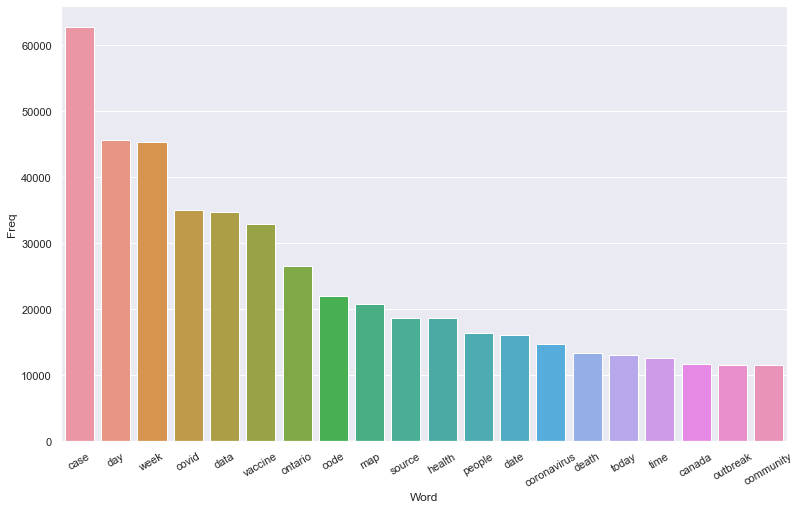

In [142]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)});
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'map code'),
 Text(1, 0, 'code map'),
 Text(2, 0, 'last day'),
 Text(3, 0, 'day week'),
 Text(4, 0, 'doc spreadsheet'),
 Text(5, 0, 'ontario ca'),
 Text(6, 0, 'last week'),
 Text(7, 0, 'spreadsheet pacx'),
 Text(8, 0, 'pacx vq'),
 Text(9, 0, 'vq fegcald'),
 Text(10, 0, 'fegcald elozuycmi'),
 Text(11, 0, 'elozuycmi dj'),
 Text(12, 0, 'dj yainqhvepk'),
 Text(13, 0, 'yainqhvepk jhsytacl'),
 Text(14, 0, 'jhsytacl uxkwk'),
 Text(15, 0, 'uxkwk zfmnfe'),
 Text(16, 0, 'zfmnfe tq'),
 Text(17, 0, 'tq vun'),
 Text(18, 0, 'vun av'),
 Text(19, 0, 'av fuezqv')]

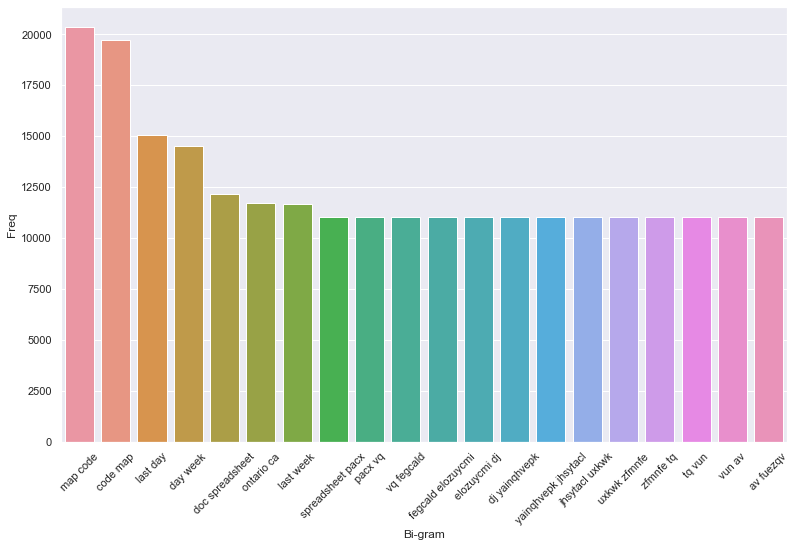

In [143]:
### Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

[Text(0, 0, 'map code map'),
 Text(1, 0, 'code map code'),
 Text(2, 0, 'doc spreadsheet pacx'),
 Text(3, 0, 'spreadsheet pacx vq'),
 Text(4, 0, 'pacx vq fegcald'),
 Text(5, 0, 'vq fegcald elozuycmi'),
 Text(6, 0, 'fegcald elozuycmi dj'),
 Text(7, 0, 'elozuycmi dj yainqhvepk'),
 Text(8, 0, 'dj yainqhvepk jhsytacl'),
 Text(9, 0, 'yainqhvepk jhsytacl uxkwk'),
 Text(10, 0, 'jhsytacl uxkwk zfmnfe'),
 Text(11, 0, 'uxkwk zfmnfe tq'),
 Text(12, 0, 'zfmnfe tq vun'),
 Text(13, 0, 'tq vun av'),
 Text(14, 0, 'vun av fuezqv'),
 Text(15, 0, 'last day week'),
 Text(16, 0, 'av fuezqv pubchart'),
 Text(17, 0, 'fuezqv pubchart oid'),
 Text(18, 0, 'pubchart oid format'),
 Text(19, 0, 'oid format interactive')]

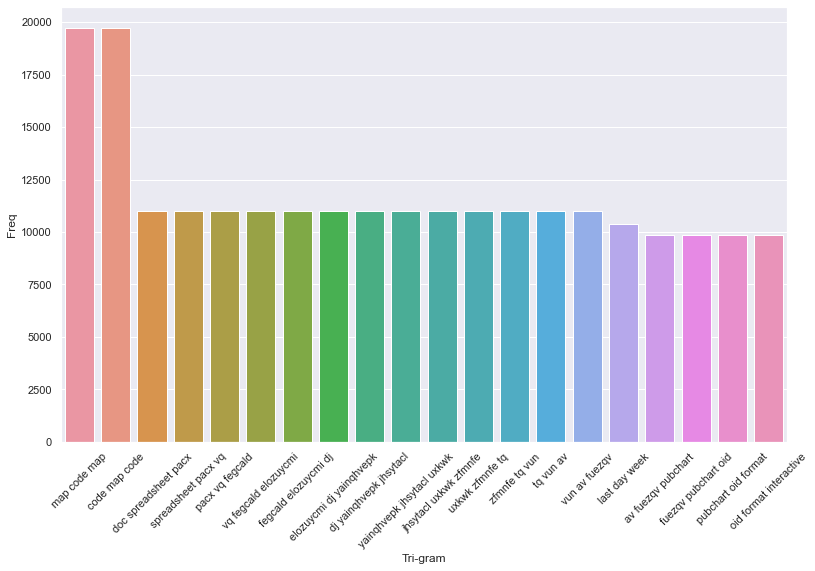

In [144]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
#print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [145]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
#print(X)
# get feature names
feature_names=cv.get_feature_names()
#print(feature_names)
 
# fetch document for which keywords needs to be extracted
doc=corpus[5000]
print(doc)
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

hope real victory sick since march long covid lost dad unexpectedly july really sucked lingering symptom relapse became part life forgot normal felt like since summer always bad relapse end september today realized symptom last day brain fog head pressure headache head finally felt like reconnected body working hour day cooking cleaning kid drinking coffee wine yet felt great really hope time recovery real wanted share think hope u long hauler


In [146]:
#tfidf_transformer.transform(cv.transform([doc]))
tf_idf_vector

<1x1000000 sparse matrix of type '<class 'numpy.float64'>'
	with 140 stored elements in Compressed Sparse Row format>

In [147]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results



In [148]:
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#print(sorted_items)
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
#print(keywords)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
hope real victory sick since march long covid lost dad unexpectedly july really sucked lingering symptom relapse became part life forgot normal felt like since summer always bad relapse end september today realized symptom last day brain fog head pressure headache head finally felt like reconnected body working hour day cooking cleaning kid drinking coffee wine yet felt great really hope time recovery real wanted share think hope u long hauler

Keywords:
relapse 0.123
hope 0.111
yet felt great 0.11
wine yet felt 0.11
wine yet 0.11
